# Algorithm Rationale plus Implementation

Clustering sequences, such as the paths visited by agents in your dataset, 
involves challenges that differ from conventional clustering tasks due to the inherent sequential nature of the data. 
To achieve a clear separation of preferences based on the paths, we should consider the following steps and methodologies
suitable for sequence clustering:

### 1. **Sequence Representation**
Before clustering, it's crucial to represent the sequences in a way that captures their essence and allows for meaningful 
comparison. Since the `Path` column contains sequences of nodes, consider these approaches:

- **Feature Extraction**: Transform each path into a feature vector. Common techniques include counting the occurrences
    of each node, sequence length, statistics like mean or median node index, or more complex features that capture the 
    sequence's structure.

- **Embedding Sequences**: Use sequence embedding techniques to represent paths in a continuous vector space. 
    Methods like Word2Vec can be adapted for this purpose, treating nodes as "words" and paths as "sentences."

### 2. **Distance Metric**
Choosing an appropriate distance metric is vital for comparing sequences. Options include:

- **Euclidean Distance**: Suitable if you use feature extraction to represent paths as fixed-length vectors.
- **Dynamic Time Warping (DTW)**: An excellent choice for sequences of varying lengths, DTW measures the similarity 
    between two temporal sequences, which may vary in speed.

### 3. **Clustering Algorithm**
With sequences represented appropriately and a distance metric chosen, select a clustering algorithm:

- **K-Means**: Effective for feature vector representations, especially when combined with a good initialization method 
    like k-means++. If using K-Means, ensure your data and distance metric are compatible.
- **Hierarchical Clustering**: Useful for obtaining a dendrogram that shows how clusters are related, 
    which can be insightful for sequence data.
- **DBSCAN or OPTICS**: Density-based algorithms that can handle noise and are less sensitive to the shape of clusters, 
    suitable for complex sequence data.

### 4. **Analyzing Clustering Results**
To interpret the clusters with respect to agent preferences, you could:
- Analyze the central tendencies of each cluster, looking at common paths or frequently visited nodes.
- Examine the distribution of `Color Preference` within each cluster to see if certain preferences are more 
associated with specific path patterns.

### Practical Steps

1. **Preprocess the `Path` Column**: Convert paths into a suitable numerical representation for clustering.
2. **Choose a Clustering Algorithm**: Based on your data representation and the nature of your sequences, select an 
    appropriate clustering method.
3. **Evaluate and Optimize**: Use metrics like silhouette score for evaluating clustering quality and adjust 
    parameters accordingly.
4. **Analyze Clusters**: Post-clustering, analyze the paths within each cluster and correlate them with other
    attributes like `Color Preference`.

This approach involves a mix of data science techniques and domain-specific insights. 
The choice of representation and clustering method may require experimentation to find what best reveals
the underlying patterns in your data.

If you choose to embed the sequences using an approach like Word2Vec, adapted for sequences (sometimes referred to as "Wave2Vec" in certain contexts, but more commonly you might be thinking about sequence embedding techniques), you essentially transform your sequences of visited nodes into dense vector representations. This transformation captures the semantic similarities between sequences based on the context in which nodes appear within those sequences. Given this approach, let’s discuss the suitable distance metric and clustering algorithm:

### Distance Metric

After embedding your sequences, you'll be working with vectors in a high-dimensional space where each dimension represents some latent feature of the sequences. In such spaces, the choice of distance metric is crucial:

- **Cosine Similarity (or Distance)**: This is one of the most suitable and widely used metrics for high-dimensional data. Cosine similarity measures the cosine of the angle between two vectors, effectively assessing how similar their directions are, which corresponds well to semantic similarity in embedding spaces. Since it measures similarity, to use it as a distance metric, you can subtract the cosine similarity from 1 (Cosine Distance = 1 - Cosine Similarity). This metric is particularly useful because it is less affected by the magnitude of the vectors and focuses on their orientation, which is a good property when dealing with embeddings.

- **Euclidean Distance**: While not always the best for high-dimensional spaces due to the curse of dimensionality, Euclidean distance can still be useful if the embeddings are of a reasonable dimension and especially if they have been further processed with dimensionality reduction techniques like PCA (Principal Component Analysis) to concentrate the essential features into a lower-dimensional space.

### Clustering Approach

Given the nature of the embedded sequences, you’ll need a clustering approach that can handle the complexity and high-dimensional nature of your data:

- **K-Means**: With a good initialization and possibly after dimensionality reduction to mitigate the curse of dimensionality, K-Means can be effective for vectorized data. However, the choice of k (the number of clusters) becomes crucial and might require domain insight or methods like the elbow method to determine.

- **Hierarchical Clustering**: Can be very insightful for understanding the structure of your data. It doesn't require specifying the number of clusters beforehand and can provide a dendrogram that visualizes the clustering process. However, it can be computationally intensive for large datasets.

- **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: This algorithm can identify clusters of varying shapes and sizes based on density, making it a robust choice for embedding-based clusters. It's particularly useful if you suspect the presence of outliers or noise in your data. One of the advantages of DBSCAN is that it does not require the number of clusters to be specified in advance.

### Implementation Consideration

When implementing these approaches, especially with K-Means or hierarchical clustering, it’s beneficial to conduct a preliminary analysis using dimensionality reduction techniques like t-SNE (t-Distributed Stochastic Neighbor Embedding) or UMAP (Uniform Manifold Approximation and Projection). These techniques can provide a visual intuition of the data structure in a lower-dimensional space, helping to inform the choice of clustering method and parameters. Additionally, for DBSCAN, selecting appropriate values for ε (epsilon) and minPts (minimum points) is crucial, which could be guided by domain knowledge or parameter tuning based on silhouette scores or similar metrics.

# The hypothesis:
    Can we infer preferences from a given trajectory dataset by clustering the trajectories using k-means and running a multi-class XGBoost 
    classifier to extract the feature importance which can be used to represent the preference features?
    
Experimental design and set-up:
    
    1. Create an enviroment depicted by a graph
    2. nodes represent an object and edges some measure of values
    3. simulate agents navigating the graph based on some preference or set of preferences, eg, node_color
    4. Infer the preferences by:
        i. first clustering the trajectory data(the path) taken by agents 
        ii. Do analytics on the clusters that you get based on features available
        iii. Run an xg boost clasifier on the clusters as target and get the feature importance which will give top predictors
             for each cluster
        iv.  Essentially, I train an XGBoost model and calculate feature importance separately for each cluster you specify in 
             the clusters_to_analyze list. It stores the feature importances for each cluster in a dictionary where the keys
             include the cluster number for reference.
    6. I then take the feature importance list as preferences to be consumed in a recommendation model

Besides dynamic time warping (DTW), there are several other methods you can use to cluster paths represented as sequences.
Here are a few alternative approaches:

1. **Sequence Alignment Algorithms**: Methods such as Needleman-Wunsch or Smith-Waterman, commonly used in bioinformatics for 
    sequence alignment, can also be applied to sequence clustering. These algorithms find the optimal alignment between two 
    sequences, allowing for differences in length and content.

2. **Hierarchical Clustering**: Hierarchical clustering algorithms, such as agglomerative clustering or divisive clustering, 
    can be applied directly to sequences using appropriate distance metrics. Hierarchical clustering creates a tree-like 
    structure (dendrogram) that can help in visualizing the clustering process and identifying clusters at different levels 
    of granularity.

3. **Sequence Embeddings and Similarity Measures**: Represent each sequence as a fixed-length vector (embedding) using 
    techniques such as word embeddings (e.g., Word2Vec) or graph embeddings (e.g., GraphSAGE). Then, use standard clustering 
    algorithms like K-means or DBSCAN on the embedded representations. Similarity measures such as cosine similarity or
    Euclidean distance can be used to compare sequence embeddings.

4. **Hidden Markov Models (HMMs)**: HMMs are probabilistic models commonly used for sequence modeling tasks. They can also be applied to clustering sequences by learning the underlying patterns in the data and assigning sequences to different states or clusters based on their likelihood under the model.

5. **Sequence-to-Sequence (Seq2Seq) Models**: Seq2Seq models, often used in natural language processing for tasks like machine translation or text summarization, can also be adapted for sequence clustering. Train a Seq2Seq model to encode input sequences into fixed-length representations (encodings), and then cluster these encodings using traditional clustering algorithms.

6. **Density-Based Clustering**: Density-based clustering algorithms such as DBSCAN (Density-Based Spatial Clustering of Applications with Noise) can also be applied to sequence data. DBSCAN groups together sequences that are closely packed in the sequence space, allowing for clusters of arbitrary shapes and sizes.

7. **Graph-Based Clustering**: Represent sequences as graphs, where nodes represent elements of the sequence (e.g., nodes for each node ID in the path), and edges represent relationships between elements (e.g., transitions between nodes in the path). Apply graph clustering algorithms such as Louvain Modularity or Spectral Clustering to identify communities of similar sequences.

Each of these methods has its strengths and weaknesses, and the choice depends on factors such as the nature of your data, computational resources, and the specific goals of your analysis. Experimenting with multiple approaches and evaluating their performance on your dataset is often the best way to find the most suitable clustering method for your task.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import time
import os

In [3]:
movie_data=pd.read_csv('movie.csv')
movie_data = movie_data.sample(n=100, random_state=42)
rating_data=pd.read_csv('rating.csv')

In [70]:
# Preprocessing the rating data to compute edge weights
# Computing edge weights as the average rating between two movies
movie_ratings = rating_data.groupby('movieId')['rating'].mean().reset_index()
movie_ratings.rename(columns={'rating': 'average_rating'}, inplace=True)

# Merge movie data with average ratings
movie_data = movie_data.merge(movie_ratings, on='movieId', how='left')

# Initialize the graph
G = nx.Graph()

# Add nodes (movies) to the graph
for _, row in movie_data.iterrows():
    G.add_node(row['movieId'], title=row['title'], genres=row['genres'])

# Create a dictionary to store edge weights (average ratings)
edge_weights = {}

# Sample a subset of user ratings
sample_size = 10
sampled_ratings = rating_data.sample(n=sample_size, random_state=42)

# Set a threshold for minimum user ratings to compute edge weights
min_ratings_threshold = 10

# Compute edge weights based on average ratings for sampled data
for _, rating_row in sampled_ratings.iterrows():
    movie1 = rating_row['movieId']
    user_rating = rating_row['rating']

    for _, rating_row2 in sampled_ratings.iterrows():
        movie2 = rating_row2['movieId']

        if movie1 != movie2:
            if (movie1, movie2) not in edge_weights:
                edge_weights[(movie1, movie2)] = [user_rating]
            else:
                edge_weights[(movie1, movie2)].append(user_rating)

# Calculate edge weights as the average of user ratings
for edge, ratings in edge_weights.items():
    if len(ratings) >= min_ratings_threshold:
        edge_weights[edge] = sum(ratings) / len(ratings)
    else:
        edge_weights[edge] = None

# Add edges to the graph with computed edge weights (filtered by threshold)
for edge, weight in edge_weights.items():
    if weight is not None:
        G.add_edge(edge[0], edge[1], weight=weight)

# Define layout for the graph
layout = nx.spring_layout(G)


Simulate Agent Navigation:
Define how agents navigate the graph based on preferences.
Simulate agents' trajectories (paths) as a sequence of movie selections.

In [72]:
def simulate_agent_trajectory(graph, start_node, num_steps):
    trajectory = [start_node]
    current_node = start_node

    for _ in range(num_steps):
        neighbors = list(graph.neighbors(current_node))
        if neighbors:
            next_node = random.choice(neighbors)
            trajectory.append(next_node)
            current_node = next_node

    return trajectory

# Simulate agent trajectories for preference inference
num_agents = 100  # Number of agents to simulate
trajectory_data = []

for _ in range(num_agents):
    start_node = random.choice(list(G.nodes))
    trajectory = simulate_agent_trajectory(G, start_node, num_steps=10)  # Adjust num_steps as needed
    trajectory_data.append(trajectory)


Clustering Trajectory Data:
Cluster agent trajectories (paths) to identify groups of similar navigation patterns.

In [73]:
from sklearn.cluster import KMeans

# Convert trajectory data for clustering

# Perform trajectory clustering using K-Means or other clustering algorithms
num_clusters = 4  # Number of clusters to identify
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(trajectory_data)


C:\Users\taodz\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Analytics on Clusters:
Analyze the clusters of agent trajectories based on available features.
Calculate statistics, identify common preferences, or perform any desired analysis.

In [ ]:
# Analyze clusters (e.g., calculate statistics for each cluster)
cluster_stats = []

for cluster_id in range(num_clusters):
    cluster_indices = [i for i, label in enumerate(cluster_labels) if label == cluster_id]
    cluster_trajectories = [trajectory_data[i] for i in cluster_indices]
    
    # Calculate statistics, preferences, or any desired analysis for this cluster
  
    cluster_stats.append({
        'cluster_id': cluster_id,
        'num_agents': len(cluster_indices),
    
    })


XGBoost Classifier for Preference Inference:
Train an XGBoost classifier for each cluster to identify top predictors (feature importance) for preferences within that cluster.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define a function to train XGBoost and get feature importances for a cluster
def train_xgboost_for_cluster(cluster_id, cluster_trajectories):
    # Convert cluster data to suitable features and labels for XGBoost

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and fit the XGBoost model
    model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
    model.fit(X_train, y_train)

    # Get feature importances
    feature_importances = model.feature_importances_

    # Store feature importances in a DataFrame
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
    
    return feature_importance_df

# Train XGBoost and get feature importances for each cluster
feature_importance_dict = {}

for cluster_id in range(num_clusters):
    cluster_indices = [i for i, label in enumerate(cluster_labels) if label == cluster_id]
    cluster_trajectories = [trajectory_data[i] for i in cluster_indices]

    # Train XGBoost and get feature importances for this cluster
    feature_importance_df = train_xgboost_for_cluster(cluster_id, cluster_trajectories)

    # Store feature importances in the dictionary
    feature_importance_dict[f'Cluster_{cluster_id}_importance'] = feature_importance_df


In [ ]:
# Perform hierarchical clustering using AgglomerativeClustering
clustering = AgglomerativeClustering(affinity='precomputed', linkage='complete')
clusters = clustering.fit_predict(distance_matrix)

# Add cluster labels to the DataFrame
filtered_df['Cluster'] = clusters
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


In [1]:
# Clustering Exeprimental Algorithm

{0: 'red', 1: 'yellow', 2: 'red', 3: 'yellow', 4: 'red', 5: 'yellow', 6: 'red', 7: 'yellow', 8: 'red', 9: 'yellow', 10: 'red', 11: 'yellow', 12: 'red', 13: 'yellow', 14: 'red', 15: 'yellow', 16: 'red', 17: 'yellow', 18: 'red', 19: 'yellow', 20: 'red', 21: 'yellow', 22: 'red', 23: 'yellow', 24: 'red', 25: 'yellow', 26: 'red', 27: 'yellow', 28: 'red', 29: 'yellow', 30: 'red', 31: 'yellow', 32: 'red', 33: 'yellow', 34: 'red', 35: 'yellow', 36: 'red', 37: 'yellow', 38: 'red', 39: 'yellow', 40: 'red', 41: 'yellow', 42: 'red', 43: 'yellow', 44: 'red', 45: 'yellow', 46: 'red', 47: 'yellow', 48: 'red', 49: 'yellow'}


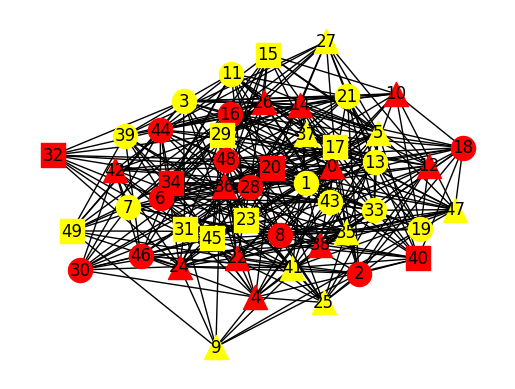

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import time

def generate_colored_graph(num_nodes, colors, edge_probability, node_color_seed, edge_seed):
    # Initialize graph
    G = nx.Graph()

    # Set random seeds
    random.seed(node_color_seed)
    edge_random = random.Random(edge_seed)

    # Generate color weights
    color_weights = {color: edge_random.uniform(0.5, 1.5) for color in colors}

    # Define shapes and shininess
    shapes = ['circle', 'square', 'triangle']
    shininess = ['shiny', 'not_shiny']

    # Add nodes with colors, weights, shapes, and shininess
    for i in range(num_nodes):
        weight = color_weights[colors[i % len(colors)]]
        color = colors[i % len(colors)]
        shape = random.choice(shapes)  # Randomly select a shape
        shiny = random.choice(shininess)  # Randomly select shininess

        G.add_node(i, weight=weight, color=color, shape=shape, shiny=shiny)

    # Add edges based on edge probability
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if edge_random.random() < edge_probability:
                G.add_edge(i, j, weight=edge_random.uniform(0.5, 1.5))

    return G

# A* Implementation 
def find_shortest_path(G, start_node, end_node):
    path = nx.astar_path(G, start_node, end_node)
    edge_weights = []
    for i in range(len(path)-1):
        edge_weights.append(G[path[i]][path[i+1]]['weight'])
    print("Path:", path)
    print("Edge weights:", edge_weights)
    return path
def plot_colored_graph(G):
    # Define custom mapping of shapes to Matplotlib markers
    shape_to_marker = {'circle': 'o', 'square': 's', 'triangle': '^'}

    # Create a mapping of node shapes to markers for plotting
    node_shapes = {
        'circle': 'o',     # Circle marker
        'square': 's',     # Square marker
        'triangle': '^'    # Triangle marker
    }

    # Create a mapping of node colors
    node_colors = [G.nodes[i]['color'] for i in G.nodes()]

    # Define positions of nodes for plotting (you can use a different layout if needed)
    pos = nx.spring_layout(G, seed=42)

    # Create a mapping of node shapes to markers for plotting
    node_markers = [node_shapes.get(G.nodes[i]['shape'], 'o') for i in G.nodes()]

    # Draw nodes with custom shapes and colors
    for node, shape, color in zip(G.nodes, node_markers, node_colors):
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=300, node_shape=shape, node_color=color)

    # Draw edges and labels (if needed)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)

    # Display the plot
    plt.axis('off')
    plt.show()
import random

class Agent:
    def __init__(self, start_node, end_node, color_preference):
        self.current_node = start_node
        self.color_preference = color_preference
        self.visited_nodes = set()
        self.visited_shapes = []  # List to store visited shapes
        self.visited_shininess = []  # List to store visited shininess
        self.start_node = start_node
        self.end_node = end_node

    def find_next_node(self, graph):
        neighboring_nodes = list(graph.neighbors(self.current_node))
        unvisited_neighbors = [node for node in neighboring_nodes if node not in self.visited_nodes]

        neighbors_with_preference = [node for node in unvisited_neighbors if graph.nodes[node]['color'] == self.color_preference]

        if neighbors_with_preference:
            # Bias factor: e.g., 90% chance to choose a node with the preferred color
            if random.random() < 1:  # Adjust this value to change the bias strength
                next_node = random.choice(neighbors_with_preference)
            else:
                # With the remaining chance, choose from any unvisited neighbor
                next_node = random.choice(unvisited_neighbors)
        elif unvisited_neighbors:
            # Choose any unvisited neighbor if no preferred color nodes are available
            next_node = random.choice(unvisited_neighbors)
        else:
            # No valid neighbors, return None
            next_node = None

        return next_node

    def traverse_graph(self, graph):
        path = [self.current_node]

        while self.current_node != self.end_node:
            next_node = self.find_next_node(graph)

            if next_node is None:
                # No more valid nodes to traverse, break the loop
                break

            self.visited_nodes.add(next_node)
            path.append(next_node)

            # Record shape and shininess of the visited node
            self.visited_shapes.append(graph.nodes[next_node]['shape'])
            self.visited_shininess.append(graph.nodes[next_node]['shiny'])

            # Move to the next node by following the edge
            self.current_node = next_node

        return path

# Create the colored graph
num_nodes = 50
edge_probability = 0.3
node_color_seed = 42
edge_seed = 123
colors = ['red', 'yellow']
G = generate_colored_graph(num_nodes, colors, edge_probability, node_color_seed, edge_seed)
color_lookup = {}

for node in G.nodes():
    color = G.nodes[node]['color']
    color_lookup[node] = color

print(color_lookup)
# Simulate agents with additional features (shapes and shininess)
def simulate_agents(graph, num_agents, num_traversals):
    agent_data = []
    
    for traversal in range(num_traversals):
        success_count = [0] * num_agents  # To track success rate for each agent

        for agent_id in range(num_agents):
            # Create a new agent for each traversal
            start_node = random.choice(list(graph.nodes()))
            end_node = random.choice(list(graph.nodes()))
            color_preference = random.choice(colors)
            agent = Agent(start_node, end_node, color_preference)

            # Record the start time
            start_time = time.time()

            # Traverse the graph with the agent
            path = agent.traverse_graph(graph)

            # Record the end time and compute the time taken
            end_time = time.time()
            time_taken = end_time - start_time
            
            # Check if reached destination
            reached_destination = agent.current_node == agent.end_node
            if reached_destination:
                success_count[agent_id] += 1

            # Compute new variables
            average_speed = len(path) / time_taken if time_taken > 0 else None
            preferred_color_count = sum(1 for node in path if graph.nodes[node]['color'] == color_preference)
            distinct_nodes_visited = len(set(path))
            path_complexity = sum(1 for i in range(1, len(path)) if path[i] != path[i - 1])  
            #Path_complexity is calculated as the count of distinct elements in the path sequence. 
            #i.e., the number of times a different element appears compared to its previous element in the sequence.
#             traversal_success_rate = success_count[agent_id] / (traversal + 1)

            # Additional variables related to shapes and shininess
            visited_shapes = agent.visited_shapes
            visited_shininess = agent.visited_shininess

            # Saving the trajectory data of the agent, including the new variables
            agent_trajectory = {
                'Agent': agent_id,
                'Start Node': start_node,
                'End Node': end_node,
                'Color Preference': color_preference,
                'Path': path,
                'Length': len(path),
                'Time Taken': time_taken,
                'reached_destination': reached_destination,
                'Preferred_Color_Count': preferred_color_count,
                'Distinct_Nodes_Visited': distinct_nodes_visited,
                'Path_Complexity': path_complexity,
#                 'Traversal_Success_Rate': traversal_success_rate,
                'Visited_Shapes': visited_shapes,
#                 'Visited_Shininess': visited_shininess
            }

            agent_data.append(agent_trajectory)

    # Create a dataframe from the agent data
    df = pd.DataFrame(agent_data)
    return df


# Generate the colored graph
G = generate_colored_graph(num_nodes, colors, edge_probability, node_color_seed, edge_seed)
plot_colored_graph(G)
# Set the number of agents and traversals
num_agents = 50
num_traversals = 100


In [17]:
# Simulate agents traversing the graph and collect the trajectory data
trajectory_df = simulate_agents(G, num_agents, num_traversals)
filtered_df = trajectory_df[trajectory_df['reached_destination'] == True]
filtered_df = filtered_df[filtered_df['Start Node'] != filtered_df['End Node']]
filtered_df.drop("reached_destination", axis=1, inplace=True)
filtered_df.reset_index(drop=True, inplace=True)

# Function to map nodes to colors using the lookup table
def map_nodes_to_colors(path, color_lookup):
    return [color_lookup[node] for node in path]

# Apply the mapping function to the 'Path' variable in your dataset
filtered_df['Mapped_Colors'] = filtered_df['Path'].apply(lambda path: map_nodes_to_colors(path, color_lookup))

# Now 'Mapped_Colors' contains the mapped colors for each node in the path
# You can use this modified dataset for clustering

# Function to combine mapped colors and path
def combine_colors_and_path(mapped_colors, path):
    combined = []
    for color, node in zip(mapped_colors, path):
        combined.append((color, node))
    return combined

# Apply the function to the 'Mapped_Colors' and 'Path' variables
filtered_df['Combined_Colors_Path'] = filtered_df.apply(lambda row: combine_colors_and_path(row['Mapped_Colors'], row['Path']), axis=1)

# Now 'Combined_Colors_Path' contains the combined colors and path for each row
# You can use this modified dataset for hierarchical clustering
def combine_colors_and_path_to_binary(mapped_colors, path, color_set):
    combined_binary = []
    for node in path:
        color_binary = [1 if color == node_color else 0 for node_color in color_set]
        combined_binary.extend(color_binary)
    return combined_binary

# Get unique colors from the dataset
color_set = set(filtered_df['Mapped_Colors'].explode())

# Apply the function to the 'Mapped_Colors' and 'Path' variables
filtered_df['Combined_Colors_Path_Binary'] = filtered_df.apply(lambda row: combine_colors_and_path_to_binary(row['Mapped_Colors'], row['Path'], color_set), axis=1)
from scipy.spatial.distance import hamming
from sklearn.cluster import AgglomerativeClustering

# Function to compute Hamming distance between two binary vectors
def compute_hamming_distance(vector1, vector2):
    return hamming(vector1, vector2)
# Calculate the maximum length of binary vectors
max_length = max(len(vector) for vector in filtered_df['Combined_Colors_Path_Binary'])

# Pad the binary vectors with zeros to ensure consistent length
padded_binary_vectors = []
for vector in filtered_df['Combined_Colors_Path_Binary']:
    padded_vector = vector + [0] * (max_length - len(vector))
    padded_binary_vectors.append(padded_vector)

In [15]:

# Calculate pairwise Hamming distances between trajectories
distance_matrix = []
for i in range(len(filtered_df)):
    distances = []
    for j in range(len(filtered_df)):
        if i == j:
            distances.append(0)  # Diagonal elements
        else:
            distance = compute_hamming_distance(padded_binary_vectors[i], padded_binary_vectors[j])
            distances.append(distance)
    distance_matrix.append(distances)


KeyboardInterrupt: 

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import time

def generate_colored_graph(num_nodes, colors, edge_probability, node_color_seed, edge_seed):
    # Initialize graph
    G = nx.Graph()

    # Set random seeds
    random.seed(node_color_seed)
    edge_random = random.Random(edge_seed)

    # Generate color weights
    color_weights = {color: edge_random.uniform(0.5, 1.5) for color in colors}

    # Define shapes and shininess
    shapes = ['circle', 'square', 'triangle']
    shininess = ['shiny', 'not_shiny']

    # Add nodes with colors, weights, shapes, and shininess
    for i in range(num_nodes):
        weight = color_weights[colors[i % len(colors)]]
        color = colors[i % len(colors)]
        shape = random.choice(shapes)  # Randomly select a shape
        shiny = random.choice(shininess)  # Randomly select shininess

        G.add_node(i, weight=weight, color=color, shape=shape, shiny=shiny)

    # Add edges based on edge probability
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if edge_random.random() < edge_probability:
                G.add_edge(i, j, weight=edge_random.uniform(0.5, 1.5))

    return G

# A* Implementation 
def find_shortest_path(G, start_node, end_node):
    path = nx.astar_path(G, start_node, end_node)
    edge_weights = []
    for i in range(len(path)-1):
        edge_weights.append(G[path[i]][path[i+1]]['weight'])
    print("Path:", path)
    print("Edge weights:", edge_weights)
    return path
def plot_colored_graph(G):
    # Define custom mapping of shapes to Matplotlib markers
    shape_to_marker = {'circle': 'o', 'square': 's', 'triangle': '^'}

    # Create a mapping of node shapes to markers for plotting
    node_shapes = {
        'circle': 'o',     # Circle marker
        'square': 's',     # Square marker
        'triangle': '^'    # Triangle marker
    }

    # Create a mapping of node colors
    node_colors = [G.nodes[i]['color'] for i in G.nodes()]

    # Define positions of nodes for plotting (you can use a different layout if needed)
    pos = nx.spring_layout(G, seed=42)

    # Create a mapping of node shapes to markers for plotting
    node_markers = [node_shapes.get(G.nodes[i]['shape'], 'o') for i in G.nodes()]

    # Draw nodes with custom shapes and colors
    for node, shape, color in zip(G.nodes, node_markers, node_colors):
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=300, node_shape=shape, node_color=color)

    # Draw edges and labels (if needed)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)

    # Display the plot
    plt.axis('off')
    plt.show()
import random

class Agent:
    def __init__(self, start_node, end_node, color_preference):
        self.current_node = start_node
        self.color_preference = color_preference
        self.visited_nodes = set()
        self.visited_shapes = []  # List to store visited shapes
        self.visited_shininess = []  # List to store visited shininess
        self.start_node = start_node
        self.end_node = end_node

    def find_next_node(self, graph):
        neighboring_nodes = list(graph.neighbors(self.current_node))
        unvisited_neighbors = [node for node in neighboring_nodes if node not in self.visited_nodes]

        neighbors_with_preference = [node for node in unvisited_neighbors if graph.nodes[node]['color'] == self.color_preference]

        if neighbors_with_preference:
            # Bias factor: e.g., 90% chance to choose a node with the preferred color
            if random.random() < 1:  # Adjust this value to change the bias strength
                next_node = random.choice(neighbors_with_preference)
            else:
                # With the remaining chance, choose from any unvisited neighbor
                next_node = random.choice(unvisited_neighbors)
        elif unvisited_neighbors:
            # Choose any unvisited neighbor if no preferred color nodes are available
            next_node = random.choice(unvisited_neighbors)
        else:
            # No valid neighbors, return None
            next_node = None

        return next_node

    def traverse_graph(self, graph):
        path = [self.current_node]

        while self.current_node != self.end_node:
            next_node = self.find_next_node(graph)

            if next_node is None:
                # No more valid nodes to traverse, break the loop
                break

            self.visited_nodes.add(next_node)
            path.append(next_node)

            # Record shape and shininess of the visited node
            self.visited_shapes.append(graph.nodes[next_node]['shape'])
            self.visited_shininess.append(graph.nodes[next_node]['shiny'])

            # Move to the next node by following the edge
            self.current_node = next_node

        return path

# Create the colored graph
num_nodes = 50
edge_probability = 0.3
node_color_seed = 42
edge_seed = 123
colors = ['red', 'yellow']
G = generate_colored_graph(num_nodes, colors, edge_probability, node_color_seed, edge_seed)
color_lookup = {}

for node in G.nodes():
    color = G.nodes[node]['color']
    color_lookup[node] = color

print(color_lookup)
# Simulate agents with additional features (shapes and shininess)
def simulate_agents(graph, num_agents, num_traversals):
    agent_data = []
    
    for traversal in range(num_traversals):
        success_count = [0] * num_agents  # To track success rate for each agent

        for agent_id in range(num_agents):
            # Create a new agent for each traversal
            start_node = random.choice(list(graph.nodes()))
            end_node = random.choice(list(graph.nodes()))
            color_preference = random.choice(colors)
            agent = Agent(start_node, end_node, color_preference)

            # Record the start time
            start_time = time.time()

            # Traverse the graph with the agent
            path = agent.traverse_graph(graph)

            # Record the end time and compute the time taken
            end_time = time.time()
            time_taken = end_time - start_time
            
            # Check if reached destination
            reached_destination = agent.current_node == agent.end_node
            if reached_destination:
                success_count[agent_id] += 1

            # Compute new variables
            average_speed = len(path) / time_taken if time_taken > 0 else None
            preferred_color_count = sum(1 for node in path if graph.nodes[node]['color'] == color_preference)
            distinct_nodes_visited = len(set(path))
            path_complexity = sum(1 for i in range(1, len(path)) if path[i] != path[i - 1])  
            #Path_complexity is calculated as the count of distinct elements in the path sequence. 
            #i.e., the number of times a different element appears compared to its previous element in the sequence.
#             traversal_success_rate = success_count[agent_id] / (traversal + 1)

            # Additional variables related to shapes and shininess
            visited_shapes = agent.visited_shapes
            visited_shininess = agent.visited_shininess

            # Saving the trajectory data of the agent, including the new variables
            agent_trajectory = {
                'Agent': agent_id,
                'Start Node': start_node,
                'End Node': end_node,
                'Color Preference': color_preference,
                'Path': path,
                'Length': len(path),
                'Time Taken': time_taken,
                'reached_destination': reached_destination,
                'Preferred_Color_Count': preferred_color_count,
                'Distinct_Nodes_Visited': distinct_nodes_visited,
                'Path_Complexity': path_complexity,
#                 'Traversal_Success_Rate': traversal_success_rate,
                'Visited_Shapes': visited_shapes,
#                 'Visited_Shininess': visited_shininess
            }

            agent_data.append(agent_trajectory)

    # Create a dataframe from the agent data
    df = pd.DataFrame(agent_data)
    return df


# Generate the colored graph
G = generate_colored_graph(num_nodes, colors, edge_probability, node_color_seed, edge_seed)
plot_colored_graph(G)
# Set the number of agents and traversals
num_agents = 50
num_traversals = 100

# Simulate agents traversing the graph and collect the trajectory data
trajectory_df = simulate_agents(G, num_agents, num_traversals)
filtered_df = trajectory_df[trajectory_df['reached_destination'] == True]
filtered_df = filtered_df[filtered_df['Start Node'] != filtered_df['End Node']]
filtered_df.drop("reached_destination", axis=1, inplace=True)
filtered_df.reset_index(drop=True, inplace=True)

# Function to map nodes to colors using the lookup table
def map_nodes_to_colors(path, color_lookup):
    return [color_lookup[node] for node in path]

# Apply the mapping function to the 'Path' variable in your dataset
filtered_df['Mapped_Colors'] = filtered_df['Path'].apply(lambda path: map_nodes_to_colors(path, color_lookup))

# Now 'Mapped_Colors' contains the mapped colors for each node in the path
# You can use this modified dataset for clustering

# Function to combine mapped colors and path
def combine_colors_and_path(mapped_colors, path):
    combined = []
    for color, node in zip(mapped_colors, path):
        combined.append((color, node))
    return combined

# Apply the function to the 'Mapped_Colors' and 'Path' variables
filtered_df['Combined_Colors_Path'] = filtered_df.apply(lambda row: combine_colors_and_path(row['Mapped_Colors'], row['Path']), axis=1)

# Now 'Combined_Colors_Path' contains the combined colors and path for each row
# You can use this modified dataset for hierarchical clustering
def combine_colors_and_path_to_binary(mapped_colors, path, color_set):
    combined_binary = []
    for node in path:
        color_binary = [1 if color == node_color else 0 for node_color in color_set]
        combined_binary.extend(color_binary)
    return combined_binary

# Get unique colors from the dataset
color_set = set(filtered_df['Mapped_Colors'].explode())

# Apply the function to the 'Mapped_Colors' and 'Path' variables
filtered_df['Combined_Colors_Path_Binary'] = filtered_df.apply(lambda row: combine_colors_and_path_to_binary(row['Mapped_Colors'], row['Path'], color_set), axis=1)
from scipy.spatial.distance import hamming
from sklearn.cluster import AgglomerativeClustering

# Function to compute Hamming distance between two binary vectors
def compute_hamming_distance(vector1, vector2):
    return hamming(vector1, vector2)
# Calculate the maximum length of binary vectors
max_length = max(len(vector) for vector in filtered_df['Combined_Colors_Path_Binary'])

# Pad the binary vectors with zeros to ensure consistent length
padded_binary_vectors = []
for vector in filtered_df['Combined_Colors_Path_Binary']:
    padded_vector = vector + [0] * (max_length - len(vector))
    padded_binary_vectors.append(padded_vector)

# Calculate pairwise Hamming distances between trajectories
distance_matrix = []
for i in range(len(filtered_df)):
    distances = []
    for j in range(len(filtered_df)):
        if i == j:
            distances.append(0)  # Diagonal elements
        else:
            distance = compute_hamming_distance(padded_binary_vectors[i], padded_binary_vectors[j])
            distances.append(distance)
    distance_matrix.append(distances)

# Perform hierarchical clustering using AgglomerativeClustering
clustering = AgglomerativeClustering(affinity='precomputed', linkage='complete')
clusters = clustering.fit_predict(distance_matrix)

# Add cluster labels to the DataFrame
filtered_df['Cluster'] = clusters
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Compute silhouette score
silhouette_avg = silhouette_score(distance_matrix, clusters)
print("Silhouette Score:", silhouette_avg)

# Compute Davies-Bouldin Index
db_index = davies_bouldin_score(distance_matrix, clusters)
print("Davies-Bouldin Index:", db_index)

# Compute Calinski-Harabasz Index
ch_index = calinski_harabasz_score(distance_matrix, clusters)
print("Calinski-Harabasz Index:", ch_index)
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering to obtain linkage matrix
linkage_matrix = linkage(distance_matrix, method='complete')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=filtered_df.index.tolist())
plt.xlabel('Trajectory Index')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()
# Calculate color counts in each cluster
color_counts_per_cluster = filtered_df.groupby(['Cluster', 'Color Preference']).size().unstack(fill_value=0)

# Display the table
print("Color Counts in Each Cluster:")
print(color_counts_per_cluster)



In [5]:
def test_agent_approach_with_color_counts(num_nodes_list, num_agents_list, num_traversals_list, colors, edge_probability):
    """
    Test the agent approach by iterating over different numbers of nodes, agents, and traversals,
    including a table of color counts in each cluster per run.

    Parameters:
    - num_nodes_list: List of numbers of nodes to test.
    - num_agents_list: List of numbers of agents to test.
    - num_traversals_list: List of numbers of traversals to test.
    - colors: List of colors for the nodes.
    - edge_probability: Probability of creating an edge between two nodes.
    
    Returns:
    - A list of dictionaries containing the results of the simulations and color counts per cluster.
    """
    overall_results = []

    for num_nodes in num_nodes_list:
        for num_agents in num_agents_list:
            for num_traversals in num_traversals_list:
                # Generate the graph
                G = generate_colored_graph(num_nodes, colors, edge_probability, node_color_seed=42, edge_seed=123)

                # Simulate agents traversing the graph and collect trajectory data
                trajectory_df = simulate_agents(G, num_agents, num_traversals)

                # Filter the DataFrame for successful traversals
                filtered_df = trajectory_df[trajectory_df['reached_destination'] == True]
                filtered_df = filtered_df[filtered_df['Start Node'] != filtered_df['End Node']]
                filtered_df.reset_index(drop=True, inplace=True)

                # Map nodes to colors
                color_lookup = {node: G.nodes[node]['color'] for node in G.nodes()}
                filtered_df['Mapped_Colors'] = filtered_df['Path'].apply(lambda path: map_nodes_to_colors(path, color_lookup))

                # Perform clustering
                color_set = set(colors)
                filtered_df['Combined_Colors_Path_Binary'] = filtered_df.apply(lambda row: combine_colors_and_path_to_binary(row['Mapped_Colors'], row['Path'], color_set), axis=1)

                # Compute distance matrix and perform clustering
                distance_matrix = np.array([[compute_hamming_distance(v1, v2) for v2 in filtered_df['Combined_Colors_Path_Binary']] for v1 in filtered_df['Combined_Colors_Path_Binary']])
                clustering = AgglomerativeClustering(affinity='precomputed', linkage='complete')
                clusters = clustering.fit_predict(distance_matrix)
                filtered_df['Cluster'] = clusters

                # Calculate cluster metrics
                silhouette_avg = silhouette_score(distance_matrix, clusters, metric="precomputed")
                db_index = davies_bouldin_score(distance_matrix, clusters)
                ch_index = calinski_harabasz_score(distance_matrix, clusters)

                # Calculate color counts in each cluster
                color_counts_per_cluster = filtered_df.groupby(['Cluster', 'Color Preference']).size().unstack(fill_value=0)

                # Compile results
                results = {
                    'num_nodes': num_nodes,
                    'num_agents': num_agents,
                    'num_traversals': num_traversals,
                    'silhouette_score': silhouette_avg,
                    'db_index': db_index,
                    'ch_index': ch_index,
                    'color_counts_per_cluster': color_counts_per_cluster.to_dict()
                }
                overall_results.append(results)

    return overall_results

# Example usage
# num_nodes_list = [25, 50]
# num_agents_list = [10, 20]
# num_traversals_list = [50, 100]
# colors = ['red', 'yellow']
# edge_probability = 0.3

# Run the test
# results = test_agent_approach_with_color_counts(num_nodes_list, num_agents_list, num_traversals_list, colors, edge_probability)
# This function outputs a list of dictionaries, each containing the results from one set of parameters,
# including the cluster metrics and a table of color counts per cluster.


KeyError: 'Mapped_Colors'